In [7]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install snownlp pandas


Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
from snownlp import SnowNLP

# 加载CSV文件
data = pd.read_csv('new_cleaned_disney_comments.csv')  # 替换为文件路径
texts = data['comments']  # 假设文本列名为"text"

# 情感分析
data['sentiment'] = texts.apply(lambda x: SnowNLP(str(x)).sentiments)

# 分类情感倾向
data['sentiment_category'] = data['sentiment'].apply(lambda x: 'Positive' if x > 0.6 else ('Negative' if x < 0.4 else 'Neutral'))

# 结果展示
print(data[['comments', 'sentiment', 'sentiment_category']])

# 保存结果
data.to_csv('disney_comments_sentiment_analysis_results.csv', index=False)


                                 comments  sentiment sentiment_category
0                                新的英语阅读理解   0.838632           Positive
1                            不能在迪士尼建个高铁站吗   0.398111           Negative
2                             迪士尼你说，公主请回家   0.351095           Negative
3                        请问大门到动物城的高铁造好了吗？   0.735651           Positive
4                                汗流浃背了吧老弟   0.447678            Neutral
...                                   ...        ...                ...
15364                    陪跑n天，我什么是个可以拥有贝儿   0.854853           Positive
15365                            皇家宴会厅吃吗？   0.492552            Neutral
15366                    你管这站位叫达菲月，你心亏不心亏   0.488467            Neutral
15367  上迪不会真复姓玲娜了吧哈哈哈哈哈哈哈哈，主要贝儿9月要去东京和香港啦   0.851335           Positive
15368              服了，评论区居然在吵……饭圈文化无处不在哈哈   0.117256           Negative

[15369 rows x 3 columns]


In [15]:
# 统计情感倾向的数量
sentiment_counts = data['sentiment_category'].value_counts()

# 计算比例
sentiment_proportion = data['sentiment_category'].value_counts(normalize=True) * 100  # 转换为百分比

# 打印结果
print("情感数量统计：")
print(sentiment_counts)
print("\n情感比例统计：")
print(sentiment_proportion)


情感数量统计：
sentiment_category
Positive    8826
Neutral     3492
Negative    3051
Name: count, dtype: int64

情感比例统计：
sentiment_category
Positive    57.427289
Neutral     22.721062
Negative    19.851649
Name: proportion, dtype: float64


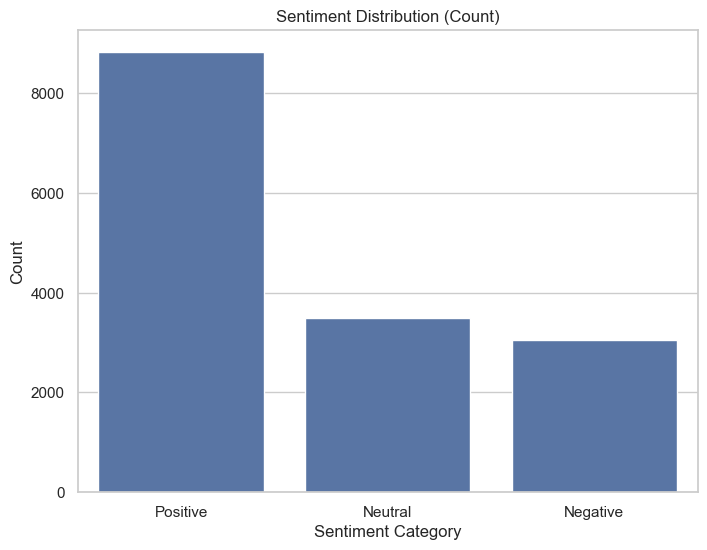

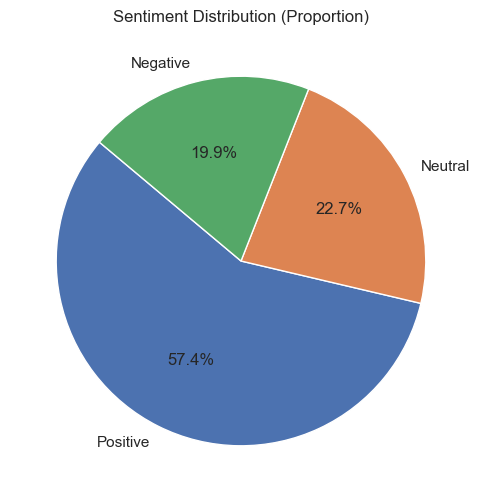

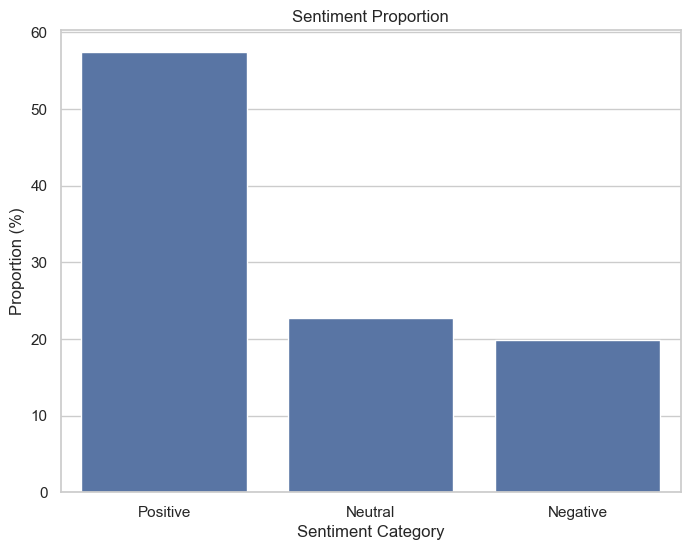

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set(style="whitegrid")

# 1. 情感分布柱状图
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sentiment_category', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution (Count)')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

# 2. 情感分布饼图
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution (Proportion)')
plt.show()

# 3. 情感倾向比例条形图
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_proportion.index, y=sentiment_proportion.values)
plt.title('Sentiment Proportion')
plt.xlabel('Sentiment Category')
plt.ylabel('Proportion (%)')
plt.show()


In [1]:
import pandas as pd

# 尝试使用不同编码读取文件，如果utf-8不适用，可以尝试gbk
try:
    data = pd.read_csv('new_cleaned_disney_comments.csv', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv('new_cleaned_disney_comments.csv', encoding='gbk')

# 重新保存为utf-8-sig格式
data.to_csv('new_cleaned_disney_comments_fixed.csv', index=False, encoding='utf-8-sig')
